# **Project #1 - Snakes N' Ladders**
> **UNICAMP**: Subject: IE509A 2019 S 2 - Processos Estocásticos para Engenharia

The main goal of this project is to calculate the probability to win the game **_Snakes N' Ladders_** in a given **_n_** round; And also, to obtain the probability that the game has already ended at a given **_n_** round;
> - 1: Probability of winning at **_n_** round;
> - 2: Probability of game already finished at **_n_** round;

The information about the game, its board and disposition can be found at: http://www.datagenetics.com/blog/november12011/



### The game board
![alt text](http://www.datagenetics.com/blog/november12011/basicboard.png)

In [0]:
# MAP OF GAME BOARD: (<BEGIN> ---> <END>)
snakes_ladders = [
    (1,38),(4,14),(9,31),(21,42),(28,84),(36,44),(51,67),(71,91),(80,100),          #LADDERS
    (98,78),(95,75),(93,73),(87,24),(64,60),(62,19),(56,53),(49,11),(48,26),(16,6)  #SNAKES
                     ]

### Import necessary Python libraries

In [0]:
# plotting library
import matplotlib.pyplot as plt

### Defining the game features:
* How many squares the gameboard has;
* What outcomes the die has;
* What probability of die outcomes are;

In [0]:
#----------------------------------------------------------------
#  GAME SPECS: Number of squares, type of die and probability
#----------------------------------------------------------------

#how many square in the game board?
final_square = 100

#what are the possible die outcomes?
die_outcomes = (1,2,3,4,5,6)

#what is the die uniform probability?
die_prob = 1/len(die_outcomes)

#EXPERIMENT: should I use the snakes and ladders jumps? INTERESTING!
use_snakes_ladders = True


### CALCULATING PROBABILITIES
* Create two arrays of length 100 to keep track of each square probability;
* Also, another array keep track of what squares were calculated in previous round;

In [0]:
#----------------------------------------------------------------
# Number of rounds to calculate 
#----------------------------------------------------------------

rounds = 200

#----------------------------------------------------------------
# CALCULATION
#----------------------------------------------------------------

#winning_prob per round
winning_prob = []

#winning_prob cummulative
winning_cumm = []

#array of probability of squares
curr_prob_squares = [0 for i in range(0,final_square+1)] #current calculation
last_prob_squares = [0 for i in range(0,final_square+1)] #from last postitions
last_prob_squares[0] = 1 #this is my start (out of the board)

#looping every round
for roll in range(1, rounds+1):

  #calculate only for the previous positions
  for last_square, last_prob in enumerate(last_prob_squares):
    
    #only calculate from non-zero probabilities 
    if last_square == final_square or last_prob == 0:
      continue
      
    #and then, calculate the next positions
    for outcome in die_outcomes:
      
      next_square = last_square + outcome
      
      #check if it goes to a snake or a ladder
      if use_snakes_ladders: #this is a flag to use or not the snakes and ladders of the game board
        for item in snakes_ladders:
          if item[0] == next_square:
            next_square = item[1]

      #win the game if next square is equal or greater than the final square
      if next_square > final_square:
        next_square = final_square
        
      #sum probabilities of going to same square
      curr_prob_squares[next_square] += last_prob * die_prob
        
  
  #RESULT: add probability of the last square to RESULT list
  winning_prob.append(curr_prob_squares[-1])
  
  #CUMMULATIVE: summing the RESULT list
  if len(winning_cumm):
    winning_cumm.append(winning_cumm[-1] + winning_prob[-1])
  else:
    winning_cumm.append(winning_prob[-1])

  #then, save the current probability to compute the NEXT ROUND
  last_prob_squares = curr_prob_squares
  curr_prob_squares = [0 for i in range(0,final_square+1)]

## Visualizing the results

- The maximum probability is 2.74743% in round  20
- The first chance appears in the   7 round with 1.971879e-01 % probability


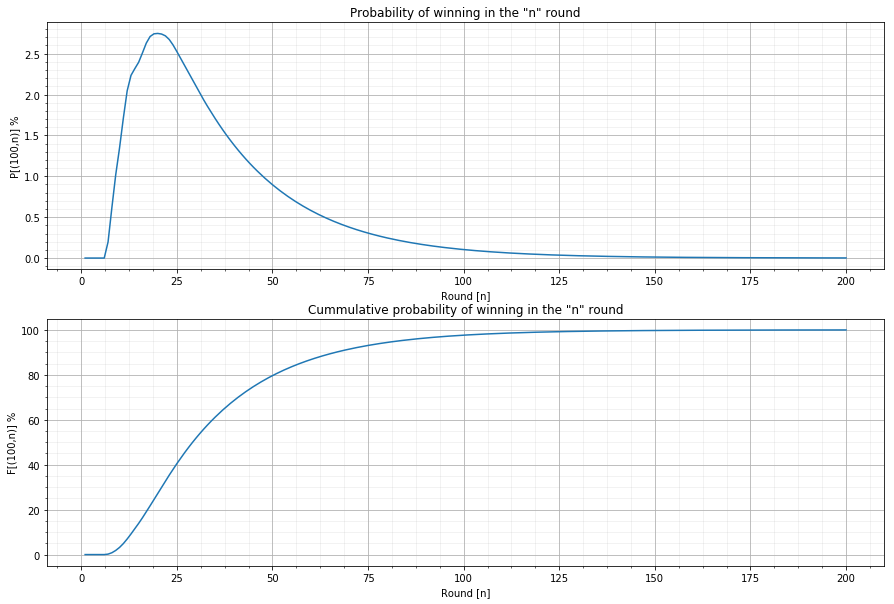

In [5]:
fig, (fig1, fig2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10));

fig1.plot(range(1, rounds + 1),[100*i for i in winning_prob]);
fig1.set_title("Probability of winning in the \"n\" round");
fig1.set_xlabel("Round [n]");
fig1.set_ylabel("P[({},n)] %".format(final_square));
fig1.grid(True, linestyle='-');
fig1.grid(True,'minor',alpha=0.2);
fig1.minorticks_on()

fig2.plot(range(1, rounds + 1),[100*i for i in winning_cumm]);
fig2.set_title("Cummulative probability of winning in the \"n\" round");
fig2.set_xlabel("Round [n]");
fig2.set_ylabel("F[({},n)] %".format(final_square));
fig2.grid(True, linestyle='-');
fig2.grid(True,'minor',alpha=0.2);
fig2.minorticks_on()

plt.show;

#Obtain what round has maximum probability
max_prob_value = 100 * max(winning_prob)
max_prob_round = [i+1 for i,j in enumerate(winning_prob) if j == max(winning_prob)][0]
print("- The maximum probability is %3.5f%% in round %3d" % (max_prob_value, max_prob_round))

#Obtain what is the first chance of winning
first_chance_round = [i for i,j in enumerate(winning_prob) if j > 0][0]
first_chance_prob  = 100*winning_prob[first_chance_round]
print("- The first chance appears in the %3d round with %e %% probability" % (first_chance_round+1, first_chance_prob))